In [1]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

# 1. Load meta-data from JSON files

In [2]:
from relgen.data.metadata import Metadata

metadata = Metadata()
metadata.load_from_json("../datasets/census/metadata.json")

# 2. Load data from CSV files

In [3]:
import pandas as pd

data = {
    "census": pd.read_csv("../datasets/census/census.csv")
}

# 3. Initialize a `Dataset` instance

In [4]:
from relgen.data.dataset import Dataset

dataset = Dataset(metadata)
dataset.fit(data)

# 4. Select and train a data synthesizer

In [5]:
from relgen.synthesizer.arsynthesizer import MADESynthesizer
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')
synthesizer = MADESynthesizer(dataset)
synthesizer.fit(data, epochs=10)

table census start training
epoch 0: train loss 45.553, time cost 6.001s
epoch 1: train loss 41.382, time cost 6.007s
epoch 2: train loss 36.608, time cost 5.975s
epoch 3: train loss 33.078, time cost 5.930s
epoch 4: train loss 30.884, time cost 5.968s
epoch 5: train loss 30.207, time cost 5.939s
epoch 6: train loss 29.558, time cost 5.949s
epoch 7: train loss 28.936, time cost 5.939s
epoch 8: train loss 28.881, time cost 5.948s
epoch 9: train loss 28.526, time cost 5.934s
table census training completed, time cost 59.595s


# 5. Generate synthetic data using the data synthesizer

In [6]:
sampled_data = synthesizer.sample()

# 6. Evaluate the synthetic data using various metrics

In [7]:
from relgen.evaluator import Evaluator

evaluator = Evaluator(data["census"], sampled_data["census"])

matplotlib data path: /Users/xiaotong/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data
CONFIGDIR=/Users/xiaotong/.matplotlib
interactive is False
platform is darwin
loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'site', 'os', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'types', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'functools', '_functools', 'google', 'mpl_toolkits', 'encodings.cp437', 'sphinxcontrib', 'zope', 'runpy', 

CACHEDIR=/Users/xiaotong/.matplotlib
Using fontManager instance from /Users/xiaotong/.matplotlib/fontlist-v330.json


Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(FontEntry(fname='/Users/xiaotong/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Users/xiaotong/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Users/xiaotong/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
fi

findfont: score(FontEntry(fname='/Users/xiaotong/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Users/xiaotong/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='/Users/xiaotong/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Users/xiaotong/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 1

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DevanagariMT.ttc', name='Devanagari MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/MarkerFelt.ttc', name='Marker Felt', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBamum-Regular.ttf', name='Noto Sans Bamum', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLepcha-Regular.ttf', name='Noto Sans Lepcha', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Corsiva.ttc', name='Corsiva Hebrew', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
fi

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntSmReg.otf', name='STIXIntegralsSm', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya Sangam MN.ttc', name='Oriya Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Library/Fonts/Arial Unicode.ttf', name='Arial Unicode MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneral.otf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansManichaean-Regular.ttf', name='Noto Sans Manichaean', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTifinagh-Regular.ttf', name='Noto Sans Tifinagh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Italic.ttf', name='Courier New', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kannada MN.ttc', name='Kannada MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorGujarati.ttc', name='Kohinoor Gujarati', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDReg.otf', name='STIXIntegralsUpD', style='normal', variant='normal', weight=400, stretch='normal', size='scalable'

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansModi-Regular.ttf', name='Noto Sans Modi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Beirut.ttc', name='Beirut', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansRunic-Regular.ttf', name='Noto Sans Runic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansArmenian.ttc', name='Noto Sans Armenian', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSoraSompeng-Regular.ttf', name='Noto Sans Sora Sompeng', style='normal', variant='normal', weight=400, stretch='normal', si

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/ITFDevanagari.ttc', name='ITF Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PlantagenetCherokee.ttf', name='Plantagenet Cherokee', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN Condensed Bold.ttf', name='DIN Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Academy Engraved LET Fonts.ttf', name='Academy Engraved LET', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKhudawadi-Regular.ttf', name='Noto Sans Khudawadi', style='normal', variant='norm

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMeeteiMayek-Regular.ttf', name='Noto Sans Meetei Mayek', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72.ttc', name='Bodoni 72', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Symbol.ttf', name='Symbol', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W9.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72 Smallcaps Book.ttf', name='Bodoni 72 Smallcaps', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfo

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleMyungjo.ttf', name='AppleMyungjo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPalmyrene-Regular.ttf', name='Noto Sans Palmyrene', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kailasa.ttc', name='Kailasa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMongolian-Regular.ttf', name='Noto Sans Mongolian', style='normal', variant='normal', weight=400, stretch='normal', size='

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu MN.ttc', name='Telugu MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMahajani-Regular.ttf', name='Noto Sans Mahajani', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTirhuta-Regular.ttf', name='Noto Sans Tirhuta', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni Ornaments.ttf', name='Bodoni Ornaments', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMarchen-Regular.ttf', name='Noto Sans Marchen', style='normal', variant='normal', weight=400, st

findfont: score(FontEntry(fname='/Users/xiaotong/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
findfont: score(FontEntry(fname='/Users/xiaotong/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996
findfont: score(FontEntry(fname='/Users/xiaotong/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Users/xiaotong/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', s

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGothic-Regular.ttf', name='Noto Sans Gothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf', name='Arial Narrow', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansRejang-Regular.ttf', name='Noto Sans Rejang', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCypriot-Regular.ttf', name='Noto Sans Cypriot', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baskerville.ttc', name='Baskerville', style='normal', variant='normal', weight=400, str

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Cochin.ttc', name='Cochin', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBhaiksuki-Regular.ttf', name='Noto Sans Bhaiksuki', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kefa.ttc', name='Kefa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer MN.ttc', name='Khmer MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Impact.ttf', name='Impact', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Athelas.ttc', name='Athelas', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/ArabicUIText.ttc', name='.Arabic UI Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Marion.ttc', name='Marion', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Menlo.ttc', name='Menlo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti Medium.ttc', name=

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymReg.otf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W5.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W7.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBatak-Regular.ttf', name='Noto Sans Batak', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhoenician-Regular.ttf', name='Noto Sans Phoenician', style='normal', variant='normal', weight=400, stretch='normal', size='scal

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Songti.ttc', name='Songti SC', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Nadeem.ttc', name='Nadeem', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Bold.ttf', name='Courier New', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhagsPa-Regular.ttf', name='Noto Sans PhagsPa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBrahmi-Regular.ttf', name='Noto Sans Brahmi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansJavanese-Regular.otf', name='Noto Sans Javanese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSylotiNagri-Regular.ttf', name='Noto Sans Syloti Nagri', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al Nile.ttc', name='Al Nile', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCoptic-Regular.ttf', name='Noto Sans Coptic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVar.otf', name='STIXVariants', style='normal', variant='normal', weight=400, stretch='nor

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Charter.ttc', name='Charter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/EuphemiaCAS.ttc', name='Euphemia UCAS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Krungthep.ttf', name='Krungthep', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W0.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPsalterPahlavi-Regular.ttf', name='Noto Sans Psalter Pahlavi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
find

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansVai-Regular.ttf', name='Noto Sans Vai', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldPermic-Regular.ttf', name='Noto Sans Old Permic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansWancho-Regular.ttf', name='Noto Sans Wancho', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansUgaritic-Regular.ttf', name='Noto Sans Ugaritic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMonoItalic.ttf', name='.SF NS Mono', style='italic', variant='normal', weight=295, stret

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSharada-Regular.ttf', name='Noto Sans Sharada', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SuperClarendon.ttc', name='Superclarendon', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia.ttf', name='Georgia', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/ArabicUIDisplay.ttc', name='.Arabic UI Display', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil Sangam MN.ttc', name='Tamil Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.

findfont: score(FontEntry(fname='/Users/xiaotong/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Users/xiaotong/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/Users/xiaotong/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/Users/xiaotong/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mshtakan.ttc', name='Mshtakan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymBol.otf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCham-Regular.ttf', name='Noto Sans Cham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Muna.ttc', name='Muna', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Italic.ttf', name='Arial', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 7.413636363636363
findfont

findfont: score(FontEntry(fname='/System/Library/Fonts/SFNS.ttf', name='System Font', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Brush Script.ttf', name='Brush Script MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldSouthArabian-Regular.ttf', name='Noto Sans Old South Arabian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMeroitic-Regular.ttf', name='Noto Sans Meroitic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/AppleSDGothicNeo.ttc', name='Apple SD Gothic Neo', style='normal', variant='normal', weight=400, stretch='normal', size=

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Bold Italic.ttf', name='Arial Narrow', style='italic', variant='normal', weight=700, stretch='condensed', size='scalable')) = 11.535
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Futura.ttc', name='Futura', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBol.otf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow.ttf', name='Arial Narrow', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVarBol.otf', name='STIXVariants', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
f

findfont: score(FontEntry(fname='/System/Library/Fonts/Hiragino Sans GB.ttc', name='Hiragino Sans GB', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMono.ttf', name='.SF NS Mono', style='normal', variant='normal', weight=295, stretch='normal', size='scalable')) = 10.14975
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldItalic-Regular.ttf', name='Noto Sans Old Italic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NewPeninimMT.ttc', name='New Peninim MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPahawhHmong-Regular.ttf', name='Noto Sans Pahawh Hmong', style='normal', variant='normal', weight=400, stretch='normal', size='s

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Bold.ttf', name='Times New Roman', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Outline 8 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansChakma-Regular.ttf', name='Noto Sans Chakma', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baghdad.ttc', name='Baghdad', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Phosphate.ttc', name='Phosphate', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDBol.otf', name='STIXIntegralsD', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMultani-Regular.ttf', name='Noto Sans Multani', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHanifiRohingya-Regular.ttf', name='Noto Sans Hanifi Rohingya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymReg.otf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagbanwa-Regular.ttf', name='Noto Sans Tagbanwa', style='normal', variant='no

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLimbu-Regular.ttf', name='Noto Sans Limbu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorBangla.ttc', name='Kohinoor Bangla', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansYi-Regular.ttf', name='Noto Sans Yi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi.ttf', name='Gurmukhi MT', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Symbols.ttf', name='Apple Symbols', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMro-Regular.ttf', name='Noto Sans Mro', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKhojki-Regular.ttf', name='Noto Sans Khojki', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SignPainter.ttc', name='SignPainter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNabataean-Regular.ttf', name='Noto Sans Nabataean', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Webdings.ttf', name='Webdings', style='normal', variant='normal', weight=400, stretch='normal', size

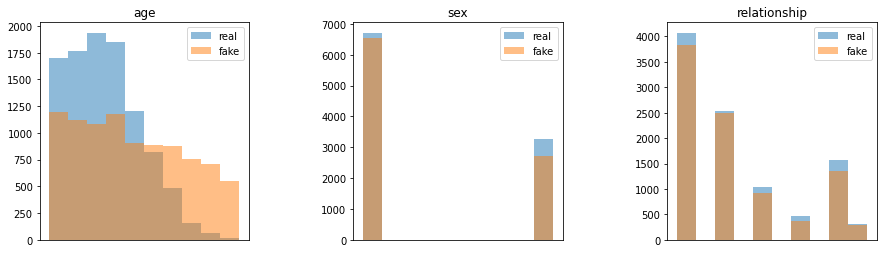

In [8]:
evaluator.eval_histogram(columns=["age", "sex", "relationship"])

In [ ]:
evaluator.eval_tsne()